In [3]:
import os
os.chdir("C:/Users/MANEESHA/Desktop/final project 2020/dataset")
os.getcwd()

'C:\\Users\\MANEESHA\\Desktop\\final project 2020\\dataset'

In [4]:
import numpy as np
import matplotlib as plt
import pandas as pd

In [67]:
train_data=pd.read_csv("d3.csv")
test_data=pd.read_csv("test.csv")

In [68]:
train_data.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
81733,da9c79a8cfde4e19,"The University of Dublin,",0,0,0,0,0,0
155347,bc73f1b8b3ee8a0a,"Biography|living=no|class=Start|listas=Jones, ...",1,0,1,0,0,0
117355,731a72fd0f736b73,"""\r\n Specifically I will not be readying any ...",0,0,0,0,0,0
148468,4d21038a165a7925,Miley Cyrus\r\nI have started a paragraph on f...,0,0,0,0,0,0
68867,b83cd1611049b01d,I tried contesting \r\n\r\nBut I can't. It's a...,0,0,0,0,0,0


In [69]:

cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

In [71]:
# check missing values in numeric columns
train_data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
unlabelled_in_all = train_data[(train_data['toxic']!=1) & (train_data['severe_toxic']!=1) & (train_data['obscene']!=1) & 
                            (train_data['threat']!=1) & (train_data['insult']!=1) & (train_data['identity_hate']!=1)]
print('Percentage of unlabelled comments is ', len(unlabelled_in_all)/len(train_data)*100)

Percentage of unlabelled comments is  89.83211235124176


In [76]:
# check for any 'null' comment
no_comment = train_data[train_data['comment_text'].isnull()]
len(no_comment)

0

In [78]:
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [81]:
no_comment = test_data[test_data['comment_text'].isnull()]
no_comment

,id,comment_text


In [83]:
# let's see the total rows in train, test data and the numbers for the various categories
print('Total rows in test is {}'.format(len(test_data)))
print('Total rows in train is {}'.format(len(train_data)))
print(train_data[cols_target].sum())

Total rows in test is 153164
Total rows in train is 159571
obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


In [84]:
# Let's look at the character length for the rows in the training data and record these
train_data['char_length'] = train_data['comment_text'].apply(lambda x: len(str(x)))

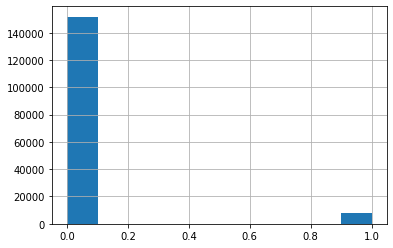

In [15]:
data1['insult'].hist(bins=10)

In [86]:
data = train_data[cols_target]

In [88]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

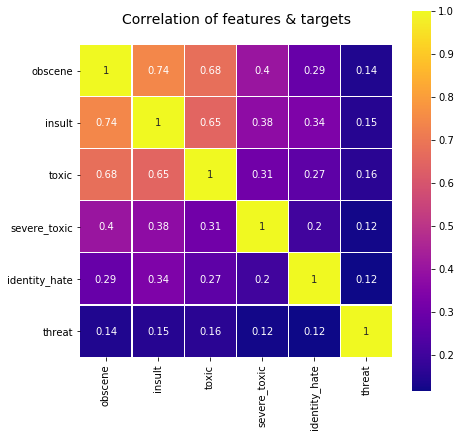

In [89]:
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [91]:
test_data['char_length'] = test_data['comment_text'].apply(lambda x: len(str(x)))

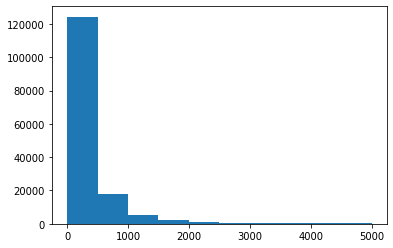

In [92]:
plt.figure()
plt.hist(test_data['char_length'])
plt.show()

In [93]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [95]:
# clean the comment_text in train_df [Thanks to Pulkit Jha for the useful pointer.]
train_data['comment_text'] = train_data['comment_text'].map(lambda com : clean_text(com))

In [96]:
# clean the comment_text in test_df [Thanks, Pulkit Jha.]
test_data['comment_text'] = test_data['comment_text'].map(lambda com : clean_text(com))

In [97]:
train_data = train_data.drop('char_length',axis=1)

In [98]:
X = train_data.comment_text
test_X = test_data.comment_text

In [99]:
print(X.shape, test_X.shape)

(159571,) (153164,)


In [100]:
# import and instantiate TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [101]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
X_dtm = vect.fit_transform(X)
# examine the document-term matrix created from X_train
X_dtm

<159571x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3178792 stored elements in Compressed Sparse Row format>

In [102]:
# transform the test data using the earlier fitted vocabulary, into a document-term matrix
test_X_dtm = vect.transform(test_X)
# examine the document-term matrix from X_test
test_X_dtm

<153164x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2618972 stored elements in Compressed Sparse Row format>

In [108]:
# import and instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=12.0)

# create submission file
submission_binary = pd.read_csv('sample_submission.csv')

for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_data[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm, y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    submission_binary[label] = test_y_prob

... Processing obscene


C:\Users\MANEESHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy is 0.9832300355327722
... Processing insult


C:\Users\MANEESHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy is 0.9755344016143285
... Processing toxic


C:\Users\MANEESHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy is 0.9639470831166064
... Processing severe_toxic


C:\Users\MANEESHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy is 0.9920536939669489
... Processing identity_hate


C:\Users\MANEESHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy is 0.9939838692494251
... Processing threat
Training accuracy is 0.9981199591404453


C:\Users\MANEESHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [109]:
submission_binary.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999958,0.460891,0.999965,0.050124,0.972258,0.428919
1,0000247867823ef7,0.002460,0.000441,0.000403,0.000324,0.003252,0.000405
2,00013b17ad220c46,0.010815,0.000117,0.003214,0.000035,0.007652,0.001237
3,00017563c3f7919a,0.001348,0.002158,0.000978,0.000117,0.000835,0.000034
4,00017695ad8997eb,0.019374,0.000815,0.001257,0.000602,0.003270,0.000562


In [110]:
# generate submission file
submission_binary.to_csv('submission_binary.csv',index=False)

In [112]:
# create submission file
submission_chains = pd.read_csv('sample_submission.csv')

# create a function to add features
def add_feature(X, feature_to_add):
    '''
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    '''
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [114]:
for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_data[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm,y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training Accuracy is {}'.format(accuracy_score(y,y_pred_X)))
    # make predictions from test_X
    test_y = logreg.predict(test_X_dtm)
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    submission_chains[label] = test_y_prob
    # chain current label to X_dtm
    X_dtm = add_feature(X_dtm, y)
    print('Shape of X_dtm is now {}'.format(X_dtm.shape))
    # chain current label predictions to test_X_dtm
    test_X_dtm = add_feature(test_X_dtm, test_y)
    print('Shape of test_X_dtm is now {}'.format(test_X_dtm.shape))

... Processing obscene


C:\Users\MANEESHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.9832300355327722
Shape of X_dtm is now (159571, 5001)
Shape of test_X_dtm is now (153164, 5001)
... Processing insult


C:\Users\MANEESHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.9818137380852411
Shape of X_dtm is now (159571, 5002)
Shape of test_X_dtm is now (153164, 5002)
... Processing toxic


C:\Users\MANEESHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.9675316943554907
Shape of X_dtm is now (159571, 5003)
Shape of test_X_dtm is now (153164, 5003)
... Processing severe_toxic


C:\Users\MANEESHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.9930375820167825
Shape of X_dtm is now (159571, 5004)
Shape of test_X_dtm is now (153164, 5004)
... Processing identity_hate


C:\Users\MANEESHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.9955756371771813
Shape of X_dtm is now (159571, 5005)
Shape of test_X_dtm is now (153164, 5005)
... Processing threat


C:\Users\MANEESHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.9985649021438733
Shape of X_dtm is now (159571, 5006)
Shape of test_X_dtm is now (153164, 5006)


In [116]:
train_data.isnull().any(),test_data.isnull().any()

(id               False
 comment_text     False
 toxic            False
 severe_toxic     False
 obscene          False
 threat           False
 insult           False
 identity_hate    False
 dtype: bool,
 id              False
 comment_text    False
 char_length     False
 dtype: bool)

In [117]:
#spliting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [118]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
x_train_sc = sc.fit(x_train)
x_train = x_train_sc.transform(x_train)
x_test = x_train_sc.transform(x_test)


In [119]:
import re
import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
data=[]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MANEESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [120]:

for i in range(0,1000):
        review=data1["comment_text"][i]
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        data.append(review)

In [39]:

for i in range(1000,10000):
        review=data1["comment_text"][i]
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        data.append(review)

In [121]:

for i in range(10000,100000):
        review=data1["comment_text"][i]
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        data.append(review)

In [122]:

for i in range(100000,110000):
        review=data1["comment_text"][i]
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        data.append(review)

In [123]:

for i in range(110000,115000):
        review=data1["comment_text"][i]
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        data.append(review)

In [124]:

for i in range(115000,115500):
        review=data1["comment_text"][i]
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        data.append(review)

In [125]:
for i in range(115500,115600):
        review=data1["comment_text"][i]
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        data.append(review)

In [126]:
for i in range(115600,115607):
        review=data1["comment_text"][i]
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        data.append(review)

In [127]:
for i in range(115607,115781):
        review=data1["comment_text"][i]
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        data.append(review)

In [128]:
data[:8]

['explan edit made usernam hardcor metallica fan revert vandal closur ga vote new york doll fac pleas remov templat talk page sinc retir',
 'aww match background colour seemingli stuck thank talk januari utc',
 'hey man realli tri edit war guy constantli remov relev inform talk edit instead talk page seem care format actual info',
 'make real suggest improv wonder section statist later subsect type accid think refer may need tidi exact format ie date format etc later one els first prefer format style refer want pleas let know appear backlog articl review guess may delay review turn list relev form eg wikipedia good articl nomin transport',
 'sir hero chanc rememb page',
 'congratul well use tool well talk',
 'cocksuck piss around work',
 'vandal matt shirvington articl revert pleas ban']

In [58]:
        
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(data).toarray()
y=train_data.iloc[:,2:7].values

In [129]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [130]:
X.shape

(159571,)

In [131]:
y.shape

(159571,)

In [132]:
test_data = pd.read_csv('test.csv')

In [133]:
test_data.describe()


,id,comment_text
count,153164,153164
unique,153164,153164
top,a202b2155226466c,the New Grove is the gold standard for verific...
freq,1,1


In [134]:
test_data.isnull().any()

id              False
comment_text    False
dtype: bool

In [136]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\MANEESHA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\MANEESHA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\MANEESHA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\MANEESHA\anaconda3\lib\site-packages\tensorflow\python\framewo

In [140]:
model = Sequential()


In [141]:
x_train.shape


(111699, 159571)

In [150]:
model.add(Dense(output_dim=15,init="random_uniform",activation='relu',input_dim=159571))#input layer

C:\Users\MANEESHA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=159571, units=15, kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [151]:
model.add(Dense(output_dim=100,init="random_uniform",activation='relu'))#hidden layer

C:\Users\MANEESHA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100, kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [152]:
model.add(Dense(output_dim=3,init='random_uniform',activation='softmax'))#output layer

C:\Users\MANEESHA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3, kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [156]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [157]:
model.fit(x_train,y_train,epochs=50,batch_size=32)

ValueError: Error when checking target: expected dense_10 to have shape (3,) but got array with shape (1,)

In [135]:
#classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
#y = data1[classes].values

In [93]:

#train_sentences = data1["comment_text"].fillna("fillna").str.lower()
#test_sentences = test_data["comment_text"].fillna("fillna").str.lower()

In [96]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import RNN, GRU, LSTM, Dense, Input, Embedding, Dropout, Activation, concatenate
from keras.layers import Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import initializers, regularizers, constraints, optimizers, layers

Using TensorFlow backend.
C:\Users\MANEESHA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\MANEESHA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\MANEESHA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\MANEESHA\anaconda3\lib\site-packages\tensorflow\python\framewo

In [98]:

max_features = 100000
max_len = 150
embed_size = 300

In [99]:
tokenizer = Tokenizer(max_features)
tokenizer.fit_on_texts(list(train_sentences))

In [100]:
tokenized_train_sentences = tokenizer.texts_to_sequences(train_sentences)
tokenized_test_sentences = tokenizer.texts_to_sequences(test_sentences)

In [101]:
train_sentences[1]

"d'aww! he matches this background colour i'm seemingly stuck with. thanks.  (talk) 21:51, january 11, 2016 (utc)"

In [102]:

tokenized_train_sentences[1]

[99215,
 53,
 2639,
 14,
 553,
 3803,
 74,
 4558,
 2699,
 22,
 95,
 39,
 807,
 2688,
 986,
 589,
 8493,
 183]

In [103]:
train_sentences[5]

'"\r\n\r\ncongratulations from me as well, use the tools well. \xa0· talk "'

In [104]:

tokenized_train_sentences[5]

[2, 2, 2689, 32, 37, 18, 101, 81, 1, 2239, 101, 13347, 39]

In [62]:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MANEESHA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [63]:
from nltk.tokenize import PunktSentenceTokenizer

In [64]:
print('Original Article: %s' % (x))
print()
print(nltk.word_tokenize(x))

Original Article:   (0, 72696)	1.0
  (1, 68357)	1.0
  (2, 79592)	1.0
  (3, 35519)	1.0
  (4, 146426)	1.0
  (5, 16222)	1.0
  (6, 65227)	1.0
  (7, 147279)	1.0
  (8, 121567)	1.0
  (9, 148006)	1.0
  (10, 32123)	1.0
  (11, 148821)	1.0
  (12, 79879)	1.0
  (13, 63430)	1.0
  (14, 108044)	1.0
  (15, 20525)	1.0
  (16, 65109)	1.0
  (17, 115291)	1.0
  (18, 128164)	1.0
  (19, 70663)	1.0
  (20, 9402)	1.0
  (21, 32385)	1.0
  (22, 10240)	1.0
  (23, 11143)	1.0
  (24, 22782)	1.0
  :	:
  (159546, 17871)	1.0
  (159547, 125172)	1.0
  (159548, 124074)	1.0
  (159549, 54795)	1.0
  (159550, 151841)	1.0
  (159551, 139803)	1.0
  (159552, 113089)	1.0
  (159553, 88174)	1.0
  (159554, 148283)	1.0
  (159555, 18185)	1.0
  (159556, 90583)	1.0
  (159557, 95673)	1.0
  (159558, 112264)	1.0
  (159559, 93591)	1.0
  (159560, 47250)	1.0
  (159561, 35691)	1.0
  (159562, 28450)	1.0
  (159563, 40523)	1.0
  (159564, 65812)	1.0
  (159565, 129559)	1.0
  (159566, 44289)	1.0
  (159567, 145720)	1.0
  (159568, 122203)	1.0
  (159569, 60

TypeError: expected string or bytes-like object

In [105]:
train_padding = pad_sequences(tokenized_train_sentences, max_len)
test_padding = pad_sequences(tokenized_test_sentences, max_len)

In [119]:
from nltk.tokenize import PunktSentenceTokenizer

In [121]:
#cust_tokenizer = PunktSentenceTokenizer(x)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all().

In [65]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [66]:
print(word_tokenize(x))

TypeError: expected string or bytes-like object